In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

: 

In [2]:
# Muat dataset
url = ("D:/Kuliah/Semester 6/Capstone/GermanCredit.csv")
df = pd.read_csv(url, delimiter=",")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Kuliah/Semester 6/Capstone/GermanCredit.csv'

In [4]:
# Tampilkan 5 baris pertama dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [5]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [6]:
# Pisahkan kolom `info` menjadi `gender` dan `marital_status`
df[['gender', 'marital_status']] = df['personal_status_sex'].str.split(' : ', expand=True)

# Hapus spasi ekstra pada kolom-kolom baru
df['gender'] = df['gender'].str.strip()
df['marital_status'] = df['marital_status'].str.strip()

# Masukkan kolom baru setelah kolom 'info' (indeks 0)
df.insert(9, 'gender', df.pop('gender'))
df.insert(10, 'marital_status', df.pop('marital_status'))

# Hapus kolom `info` and `status_pernikahan` jika ada
if 'personal_status_sex' in df.columns:
    df.drop(columns=['personal_status_sex'], inplace=True)

In [7]:
status = df['status'].unique()
credit = df['credit_history'].unique()
purpose= df['purpose'].unique()
saving= df['savings'].unique()
empdur = df['employment_duration'].unique()
gen = df['gender'].unique()
marit = df['marital_status'].unique()
debtors = df['other_debtors'].unique()
prop = df['property'].unique()
instplan = df['other_installment_plans'].unique()
house = df['housing'].unique()
job = df['job'].unique()
telpon = df['telephone'].unique()
fw = df['foreign_worker'].unique()

print("Status:",status,"\n")
print("credit_history:",credit,"\n")
print("purpose:",purpose,"\n")
print("savings:",saving,"\n")
print("employment_duration:",empdur,"\n")
print("gender:",gen,"\n")
print("marital_status:",marit,"\n")
print("other_debtors:",debtors,"\n")
print("property:",prop,"\n")
print("other_installment_plans:",instplan,"\n")
print("housing:",house,"\n")
print("job:",job,"\n")
print("telephone:",telpon,"\n")
print("foreign_worker:",fw,"\n")

Status: ['... < 100 DM' '0 <= ... < 200 DM' 'no checking account'
 '... >= 200 DM / salary for at least 1 year'] 

credit_history: ['critical account/other credits existing'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/all credits paid back duly'
 'all credits at this bank paid back duly'] 

purpose: ['domestic appliances' 'retraining' 'radio/television' 'car (new)'
 'car (used)' 'others' 'repairs' 'education' 'furniture/equipment'
 'business'] 

savings: ['unknown/no savings account' '... < 100 DM' '500 <= ... < 1000 DM'
 '... >= 1000 DM' '100 <= ... < 500 DM'] 

employment_duration: ['... >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year'] 

gender: ['male' 'female'] 

marital_status: ['single' 'divorced/separated/married' 'divorced/separated'
 'married/widowed'] 

other_debtors: ['none' 'guarantor' 'co-applicant'] 

property: ['real estate' 'building society savings agreement/life insurance'
 'unkno

In [8]:
df['employment_duration'].unique()

array(['... >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year'], dtype=object)

In [9]:
# Simpan DataFrame ke file CSV baru
df.to_csv('separated_column.csv', index=False)

In [10]:
# Inisialisasi LabelEncoder
le = LabelEncoder()


# Terapkan label encoding pada kolom tertentu
df['le_status'] = le.fit_transform(df['status'])
df['le_credit_history'] = le.fit_transform(df['credit_history'])
df['le_purpose'] = le.fit_transform(df['purpose'])
df['le_savings'] = le.fit_transform(df['savings'])
df['le_employment_duration'] = le.fit_transform(df['employment_duration'])
df['le_gender'] = le.fit_transform(df['gender'])
df['le_marital_status'] = le.fit_transform(df['marital_status'])
df['le_other_debtors'] = le.fit_transform(df['other_debtors'])
df['le_property'] = le.fit_transform(df['property'])
df['le_other_installment_plans'] = le.fit_transform(df['other_installment_plans'])
df['le_housing'] = le.fit_transform(df['housing'])
df['le_job'] = le.fit_transform(df['job'])
df['le_telephone'] = le.fit_transform(df['telephone'])
df['le_foreign_worker'] = le.fit_transform(df['foreign_worker'])

In [11]:
# Cetak label asli dan encoded berdampingan (untuk kolom 'credit_history'), hanya nilai unik
unique_label_pairs = set(zip(df['le_status'], df['status']))
for original_label, encoded_label in unique_label_pairs:
    print(f"Label asli: '{original_label}': {encoded_label}")

Label asli: '1': ... >= 200 DM / salary for at least 1 year
Label asli: '2': 0 <= ... < 200 DM
Label asli: '3': no checking account
Label asli: '0': ... < 100 DM


In [12]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,gender,marital_status,...,le_employment_duration,le_gender,le_marital_status,le_other_debtors,le_property,le_other_installment_plans,le_housing,le_job,le_telephone,le_foreign_worker
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male,single,...,1,1,3,2,2,1,1,1,1,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female,divorced/separated/married,...,2,0,1,2,2,1,1,1,0,1
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male,single,...,3,1,3,2,2,1,1,3,0,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male,single,...,3,1,3,1,0,1,0,1,0,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male,single,...,2,1,3,2,3,1,0,1,0,1


In [17]:
# Pilih kolom-kolom yang akan dimasukkan ke DataFrame baru
selected_columns = ['status', 'credit_history', 'purpose', 'savings',
                    'employment_duration', 'gender', 'marital_status',
                    'other_debtors', 'property', 'other_installment_plans',
                    'housing', 'job', 'telephone', 'foreign_worker']

# Buat DataFrame baru
new_df = df.copy()
new_df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,gender,marital_status,...,le_employment_duration,le_gender,le_marital_status,le_other_debtors,le_property,le_other_installment_plans,le_housing,le_job,le_telephone,le_foreign_worker
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male,single,...,1,1,3,2,2,1,1,1,1,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female,divorced/separated/married,...,2,0,1,2,2,1,1,1,0,1
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male,single,...,3,1,3,2,2,1,1,3,0,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male,single,...,3,1,3,1,0,1,0,1,0,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male,single,...,2,1,3,2,3,1,0,1,0,1


In [18]:
new_df = new_df.drop(columns=selected_columns)  # Membuat DataFrame baru tanpa kolom yang dihapus

In [19]:
# Tentukan urutan kolom yang baru
new_column_order = ['le_status', 'duration', 'le_credit_history', 'le_purpose', 'amount', 'le_savings', 'le_employment_duration',
                    'installment_rate', 'le_gender', 'le_marital_status', 'le_other_debtors', 'present_residence',
                    'le_property', 'age', 'le_other_installment_plans', 'le_housing', 'number_credits', 'le_job',
                    'people_liable', 'le_telephone', 'le_foreign_worker', 'credit_risk']

# Ubah urutan kolom pada DataFrame
new_df = new_df.reindex(columns=new_column_order)

new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   le_status                   1000 non-null   int32
 1   duration                    1000 non-null   int64
 2   le_credit_history           1000 non-null   int32
 3   le_purpose                  1000 non-null   int32
 4   amount                      1000 non-null   int64
 5   le_savings                  1000 non-null   int32
 6   le_employment_duration      1000 non-null   int32
 7   installment_rate            1000 non-null   int64
 8   le_gender                   1000 non-null   int32
 9   le_marital_status           1000 non-null   int32
 10  le_other_debtors            1000 non-null   int32
 11  present_residence           1000 non-null   int64
 12  le_property                 1000 non-null   int32
 13  age                         1000 non-null   int64
 14  le_other_

In [121]:
# Simpan DataFrame ke file CSV baru
new_df.to_csv('convert_numeric.csv', index=False)

In [20]:
new_df.head()

,le_status,duration,le_credit_history,le_purpose,amount,le_savings,le_employment_duration,installment_rate,le_gender,le_marital_status,...,le_property,age,le_other_installment_plans,le_housing,number_credits,le_job,people_liable,le_telephone,le_foreign_worker,credit_risk
0,0,6,1,3,1169,4,1,4,1,3,...,2,67,1,1,2,1,1,1,1,1
1,2,48,3,3,5951,0,2,2,0,1,...,2,22,1,1,1,1,1,0,1,0
2,3,12,1,9,2096,0,3,2,1,3,...,2,49,1,1,1,3,2,0,1,1
3,0,42,3,7,7882,0,3,2,1,3,...,0,45,1,0,1,1,2,0,1,1
4,0,24,2,1,4870,0,2,3,1,3,...,3,53,1,0,2,1,2,0,1,0


In [122]:
num_df = pd.read_csv('convert_numeric.csv', delimiter=',')
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   duration                    1000 non-null   int64
 1   amount                      1000 non-null   int64
 2   installment_rate            1000 non-null   int64
 3   present_residence           1000 non-null   int64
 4   age                         1000 non-null   int64
 5   number_credits              1000 non-null   int64
 6   people_liable               1000 non-null   int64
 7   credit_risk                 1000 non-null   int64
 8   le_status                   1000 non-null   int64
 9   le_credit_history           1000 non-null   int64
 10  le_purpose                  1000 non-null   int64
 11  le_savings                  1000 non-null   int64
 12  le_employment_duration      1000 non-null   int64
 13  le_gender                   1000 non-null   int64
 14  le_marita

In [134]:
data_sep = pd.read_csv('D:/Kuliah/Semester 6/Capstone/GermanCredit.csv')
data_sep.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [135]:
# Pisahkan kolom `info` menjadi `gender` dan `marital_status`
data_sep[['gender', 'marital_status']] = data_sep['personal_status_sex'].str.split(' : ', expand=True)

# Hapus spasi ekstra pada kolom-kolom baru
data_sep['gender'] = data_sep['gender'].str.strip()
data_sep['marital_status'] = data_sep['marital_status'].str.strip()

# Masukkan kolom baru setelah kolom 'info' (indeks 0)
data_sep.insert(9, 'gender', data_sep.pop('gender'))
data_sep.insert(10, 'marital_status', data_sep.pop('marital_status'))

# Hapus kolom `info` and `status_pernikahan` jika ada
if 'personal_status_sex' in data_sep.columns:
    data_sep.drop(columns=['personal_status_sex'], inplace=True)

In [136]:
data_sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   gender                   1000 non-null   object
 9   marital_status           1000 non-null   object
 10  other_debtors            1000 non-null   object
 11  present_residence        1000 non-null   int64 
 12  property                 1000 non-null   object
 13  age                      1000 non-null   int64 
 14  other_installment_plans  1000 non-null   

In [137]:
data_sep.to_csv('separated_column.csv', index=False)

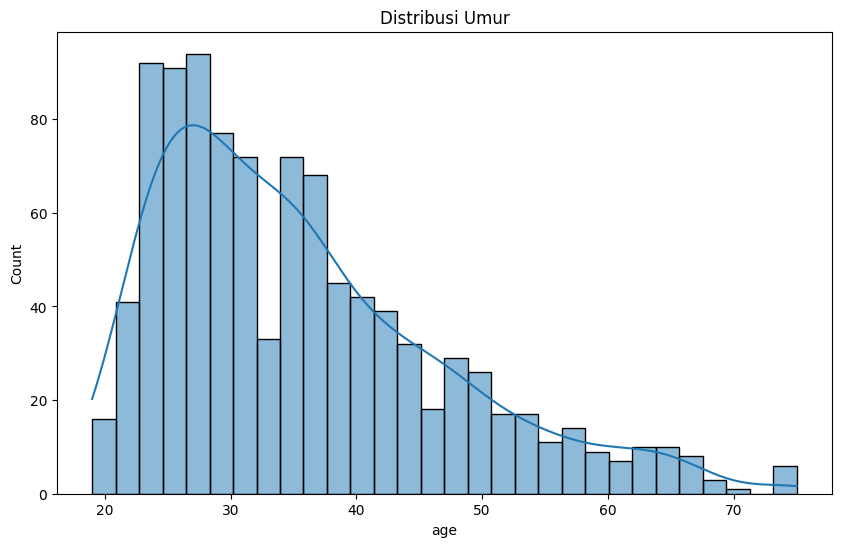

In [ ]:
# Distribusi umur
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Umur')
plt.show()

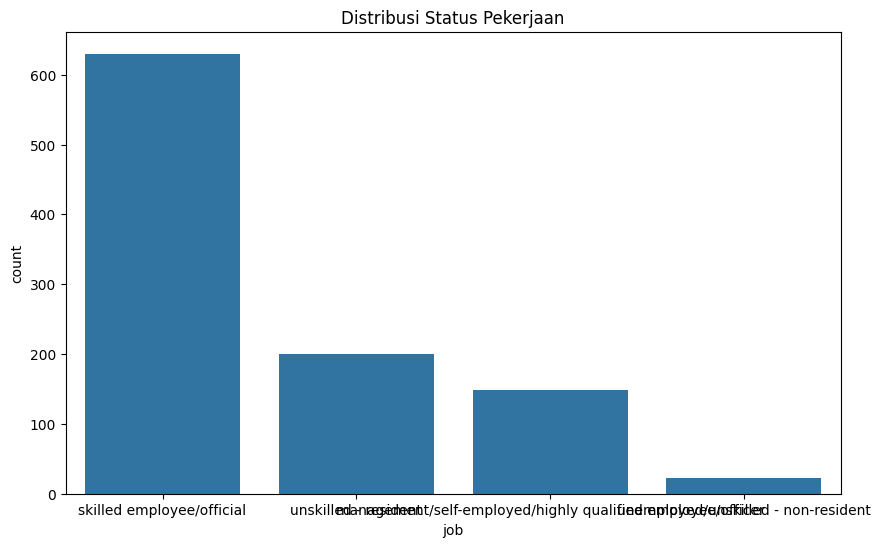

In [ ]:
# Distribusi Status Pekerjaan
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df)
plt.title('Distribusi Status Pekerjaan')
plt.show()

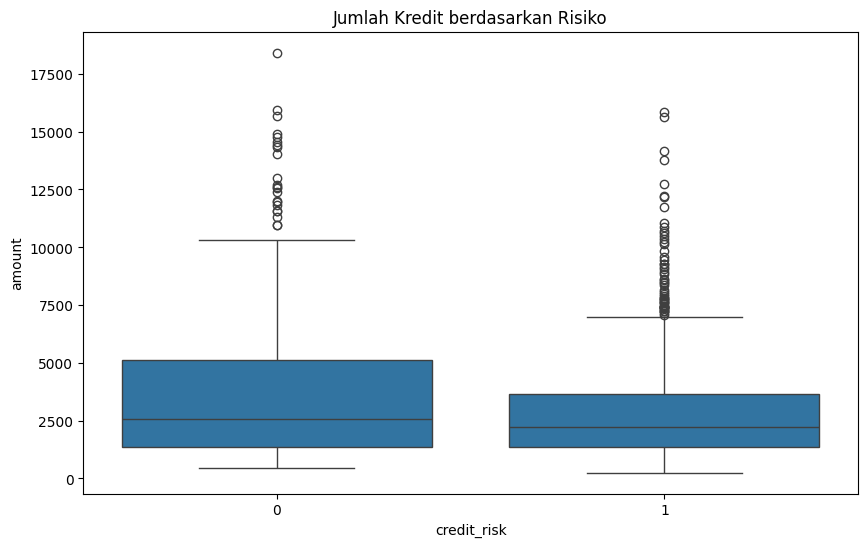

In [ ]:
# Boxplot jumlah kredit berdasarkan risiko
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_risk', y='amount', data=df)
plt.title('Jumlah Kredit berdasarkan Risiko')
plt.show()

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence           int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits              int64
job                        object
people_liable               int64
telephone                  object
foreign_worker             object
credit_risk                 int64
dtype: object
Kolom non-numerik: Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')


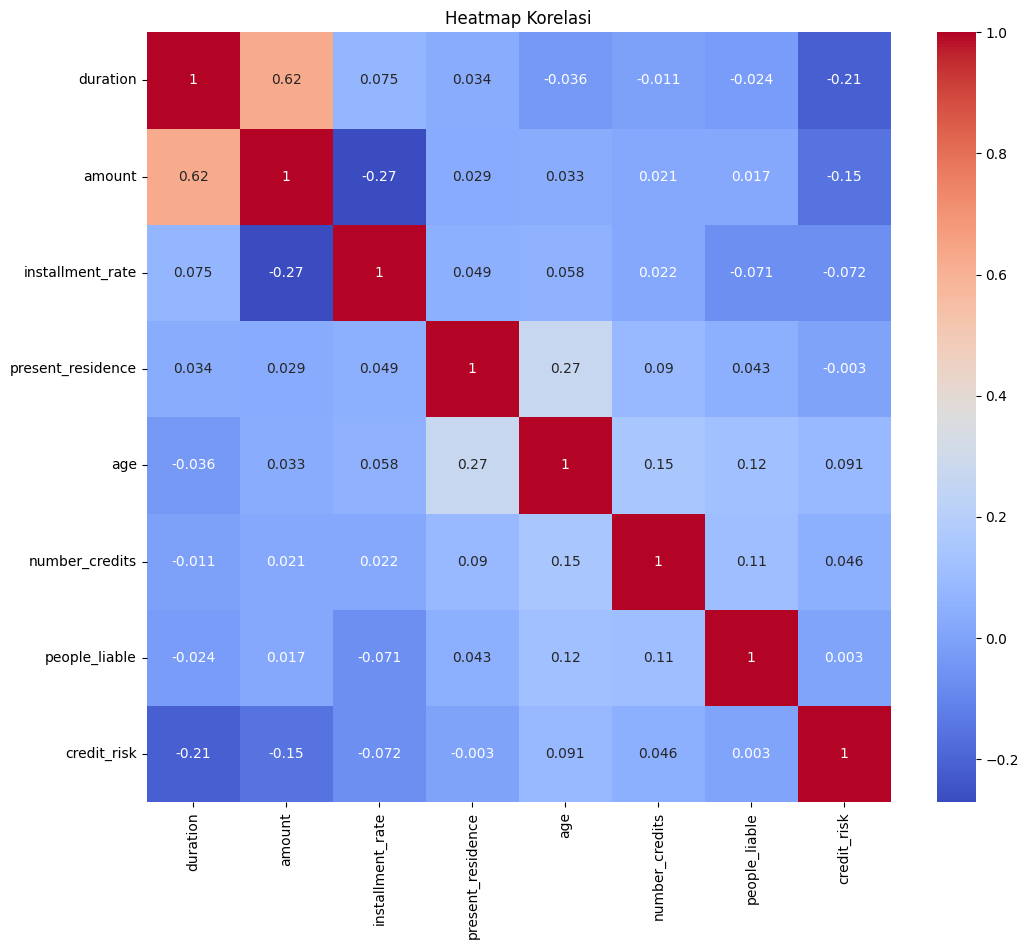

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Periksa tipe data dari setiap kolom
print(df.dtypes)

# Identifikasi kolom yang tidak numerik
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Kolom non-numerik:", non_numeric_columns)

# Opsi 1: Menghapus kolom non-numerik
df_numeric = df.drop(columns=non_numeric_columns)

# Opsi 2: Mengonversi kolom non-numerik jika memungkinkan
# df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Menghitung korelasi pada DataFrame yang sudah dibersihkan
correlation_matrix = df_numeric.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


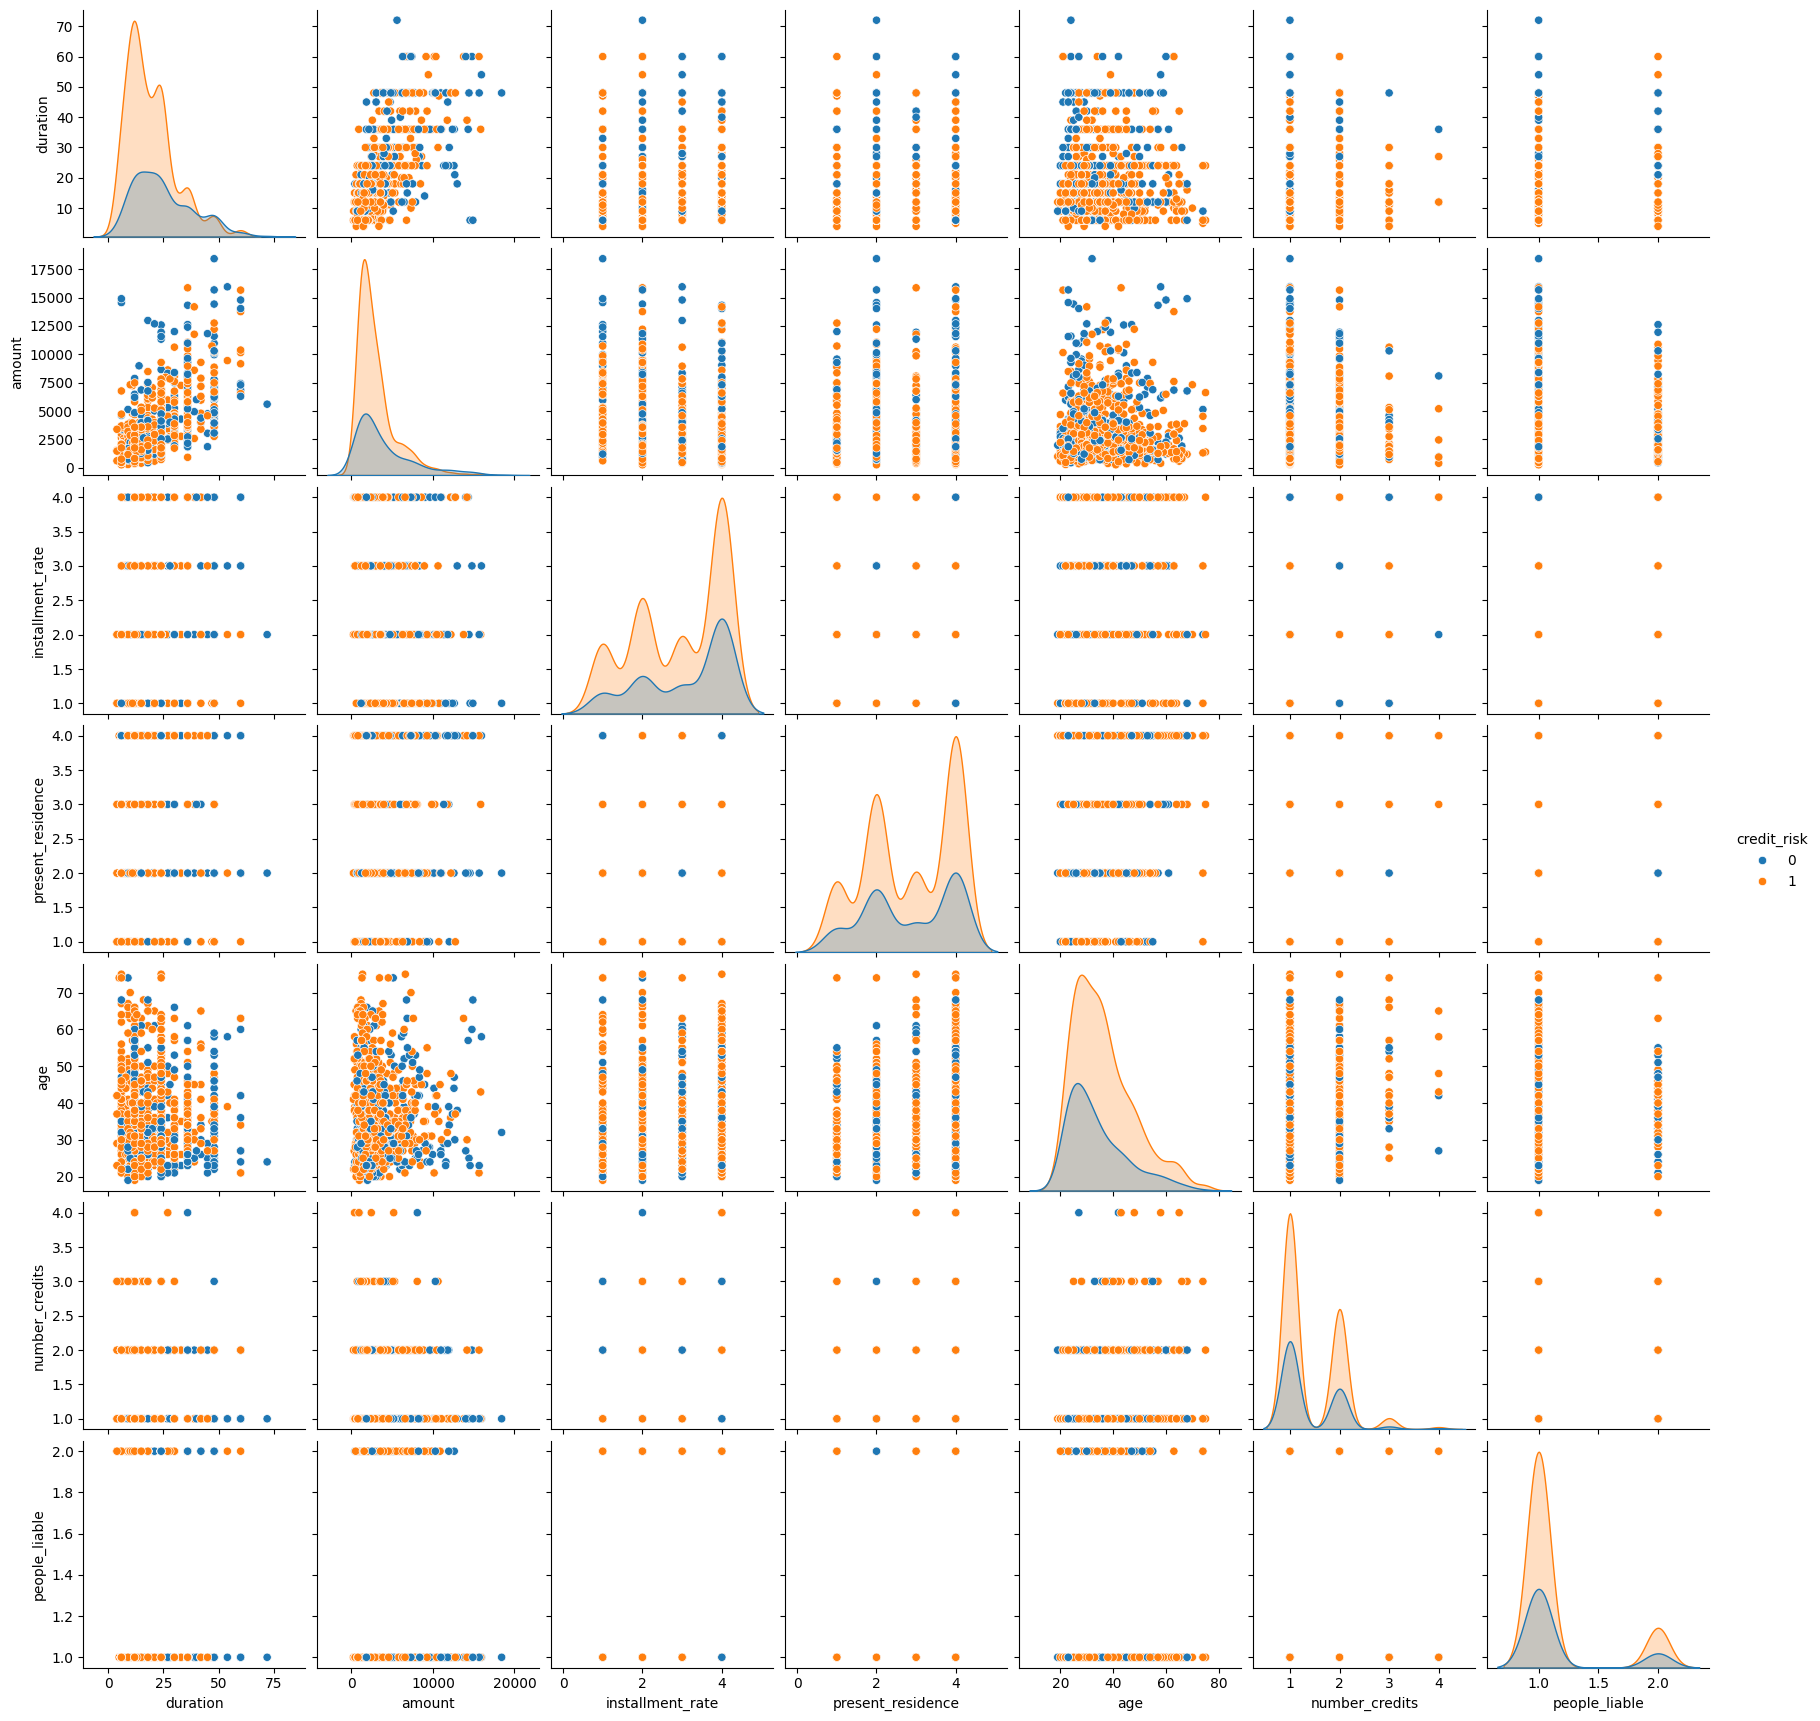

In [ ]:
# Pasangan plot untuk melihat hubungan antar variabel
sns.pairplot(df, hue='credit_risk')
plt.show()

In [2]:
df = pd.read_csv("D:\Kuliah Sanata Dharma\Semester 6\Program Bangkit (Mesin Learning Path)\Capstone Project\CapstoneML\convert_numeric.csv")

In [3]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
df = df.dropna()  # atau menggunakan imputasi


Series([], dtype: int64)


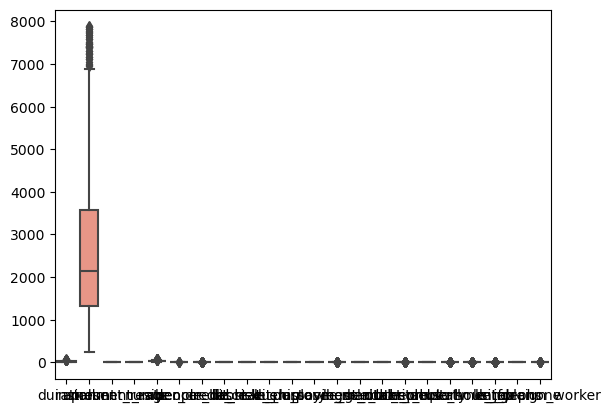

In [4]:
# Menghitung IQR
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus nilai anomali
df = df[(df['amount'] > lower_bound) & (df['amount'] < upper_bound)]


# Plot boxplot setelah menghapus anomali
sns.boxplot(data=df)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_normalized = MinMaxScaler().fit_transform(df)

In [8]:
x = df.iloc[:,0:19].values
y = df.iloc[:,-1].values


In [ ]:
import tensorflow as tf

: 

In [ ]:
X = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

In [ ]:
def train_mnist(x_train, y_train):

    ### START CODE HERE
    callbacks = myCallback()

    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(20, 1)),  # Peningkatan jumlah filter
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),  # Penambahan lapisan konvolusi
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),  # Peningkatan jumlah neuron
        Dropout(0.5),  # Penambahan dropout untuk regularisasi
        Dense(1, activation='sigmoid')
    ])

    # Penggunaan EarlyStopping untuk menghindari overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Pelatihan dengan EarlyStopping
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])  # Peningkatan jumlah epochs

    # Evaluasi
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Akurasi Model:", accuracy)

    ### END CODE HERE

    return history

In [ ]:
hist = train_mnist(X, y)

NameError: name 'Sequential' is not defined